In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [11]:
data.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [13]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [14]:
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [15]:
data[['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'Cabin']].isna().sum()


PassengerId      0
HomePlanet     201
CryoSleep      217
Destination    182
VIP            203
Name           200
Cabin          199
dtype: int64

In [16]:
data['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [17]:
data['Cabin'] = data['Cabin'].astype('str')
data[['Cabin_sector', 'Cabin_number', 'Cabin_side']] = data['Cabin'].str.split('/', expand=True)
data.drop(['Cabin'], axis=1, inplace=True)


                        

In [18]:
HP_mode = data['HomePlanet'].mode()[0]
data['HomePlanet'].fillna(HP_mode, inplace=True)

CS_mode = data['CryoSleep'].mode()[0]
data['CryoSleep'].fillna(CS_mode, inplace=True)

DES_mode = data['Destination'].mode()[0]
data['Destination'].fillna(DES_mode, inplace=True)

VIP_mode = data['VIP'].mode()[0]
data['VIP'].fillna(VIP_mode, inplace=True)

NAME_mode = data['Name'].mode()[0]
data['Name'].fillna(NAME_mode, inplace=True)


C:\Users\jakub\AppData\Local\Temp\ipykernel_33372\1424751603.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['HomePlanet'].fillna(HP_mode, inplace=True)
C:\Users\jakub\AppData\Local\Temp\ipykernel_33372\1424751603.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [19]:
test['Cabin'] = test['Cabin'].astype('str')
test[['Cabin_sector', 'Cabin_number', 'Cabin_side']] = test['Cabin'].str.split('/', expand=True)
test.drop(['Cabin'], axis=1, inplace=True)

HP_mode = test['HomePlanet'].mode()[0]
test['HomePlanet'].fillna(HP_mode, inplace=True)

CS_mode = test['CryoSleep'].mode()[0]
test['CryoSleep'].fillna(CS_mode, inplace=True)

DES_mode = test['Destination'].mode()[0]
test['Destination'].fillna(DES_mode, inplace=True)

VIP_mode = test['VIP'].mode()[0]
test['VIP'].fillna(VIP_mode, inplace=True)

NAME_mode = test['Name'].mode()[0]
test['Name'].fillna(NAME_mode, inplace=True)


                        

C:\Users\jakub\AppData\Local\Temp\ipykernel_33372\500271788.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['HomePlanet'].fillna(HP_mode, inplace=True)
C:\Users\jakub\AppData\Local\Temp\ipykernel_33372\500271788.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [20]:
data.isna().sum()


PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
Cabin_sector      0
Cabin_number    199
Cabin_side      199
dtype: int64

In [21]:
feature_caterogical = [cat for cat in data.columns if data[cat].dtype == 'object']
data[feature_caterogical] = data[feature_caterogical].astype('str')
feature_numeric = [cat for cat in data.columns if data[cat].dtype == 'float']
print(feature_caterogical)
print(feature_numeric)

['PassengerId', 'HomePlanet', 'Destination', 'Name', 'Cabin_sector', 'Cabin_number', 'Cabin_side']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

In [23]:
feature_cat = ['VIP', 'CryoSleep', 'HomePlanet', 'Destination', 'Name', 'Cabin_number', 'Cabin_side', 'Cabin_sector', 'Transported']
feature_num = [['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
le = LabelEncoder()
for column in feature_cat:
    data[column] = le.fit_transform(data[column])

feature_cat_test = ['VIP', 'CryoSleep', 'HomePlanet', 'Destination', 'Name', 'Cabin_number', 'Cabin_side', 'Cabin_sector']
for column in feature_cat_test:
    test[column] = le.fit_transform(test[column])
    
knnimputer = KNNImputer(n_neighbors = 5)
for column in feature_num:
    data[column] = knnimputer.fit_transform(data[column])
    test[column] = knnimputer.fit_transform(test[column])

In [24]:
data.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Cabin_sector    0
Cabin_number    0
Cabin_side      0
dtype: int64

In [25]:
data = data.drop('PassengerId', axis=1)
test_1 = test.drop('PassengerId', axis=1)
test_1.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Cabin_sector',
       'Cabin_number', 'Cabin_side'],
      dtype='object')

In [26]:
data = data.astype('float')
test_1 = test.astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   float64
 1   CryoSleep     8693 non-null   float64
 2   Destination   8693 non-null   float64
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Name          8693 non-null   float64
 11  Transported   8693 non-null   float64
 12  Cabin_sector  8693 non-null   float64
 13  Cabin_number  8693 non-null   float64
 14  Cabin_side    8693 non-null   float64
dtypes: float64(15)
memory usage: 1018.8 KB


In [27]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_sector,Cabin_number,Cabin_side
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,5252.0,0.0,1.0,0.0,1.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,4502.0,1.0,5.0,0.0,2.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,457.0,0.0,0.0,0.0,2.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,7149.0,0.0,0.0,0.0,2.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,8319.0,1.0,5.0,1.0,2.0


<Axes: >

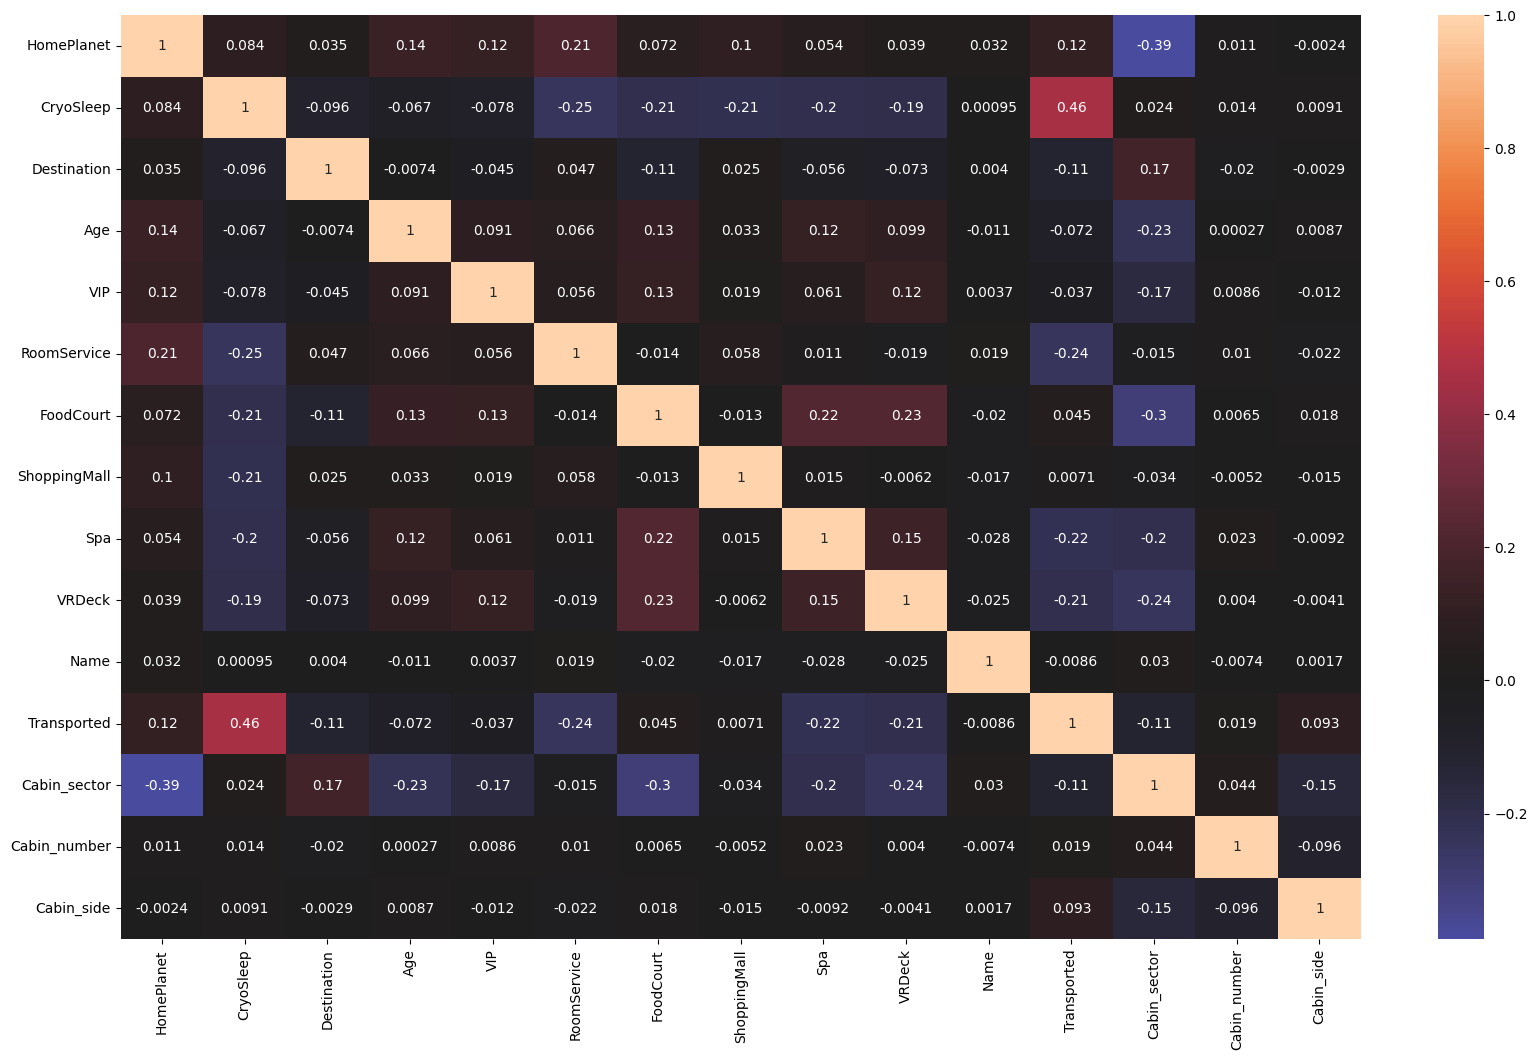

In [28]:
import seaborn as sns
corr_matrix = data.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, center=0, annot=True)

In [29]:
cols=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet', 'Destination', 'Name', 'Cabin_sector', 'Cabin_number', 'Cabin_side']


count    8693.000000
mean       28.869159
std        14.368427
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64
count     8693.000000
mean       223.937375
std        662.046544
min          0.000000
25%          0.000000
50%          0.000000
75%         51.000000
max      14327.000000
Name: RoomService, dtype: float64
count     8693.000000
mean       452.891982
std       1597.230255
min          0.000000
25%          0.000000
50%          0.000000
75%         81.000000
max      29813.000000
Name: FoodCourt, dtype: float64
count     8693.000000
mean       172.321477
std        598.500190
min          0.000000
25%          0.000000
50%          0.000000
75%         30.000000
max      23492.000000
Name: ShoppingMall, dtype: float64
count     8693.000000
mean       308.054527
std       1126.161421
min          0.000000
25%          0.000000
50%          0.000000
75%         62.000000
max      22408.000000
N

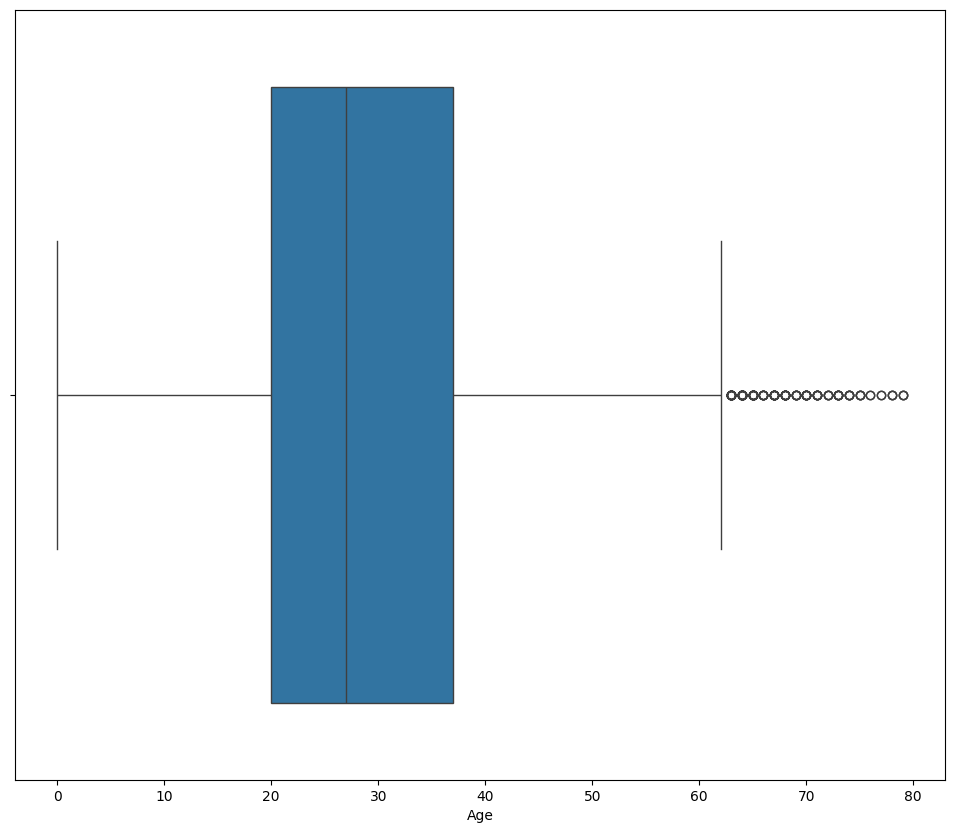

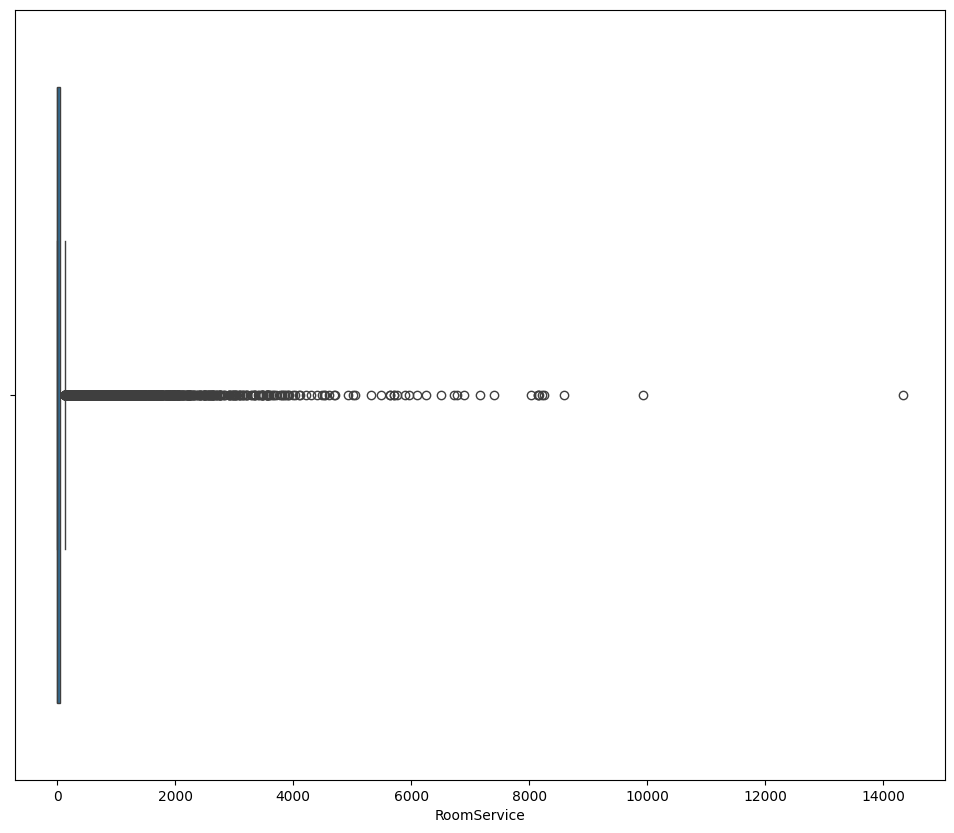

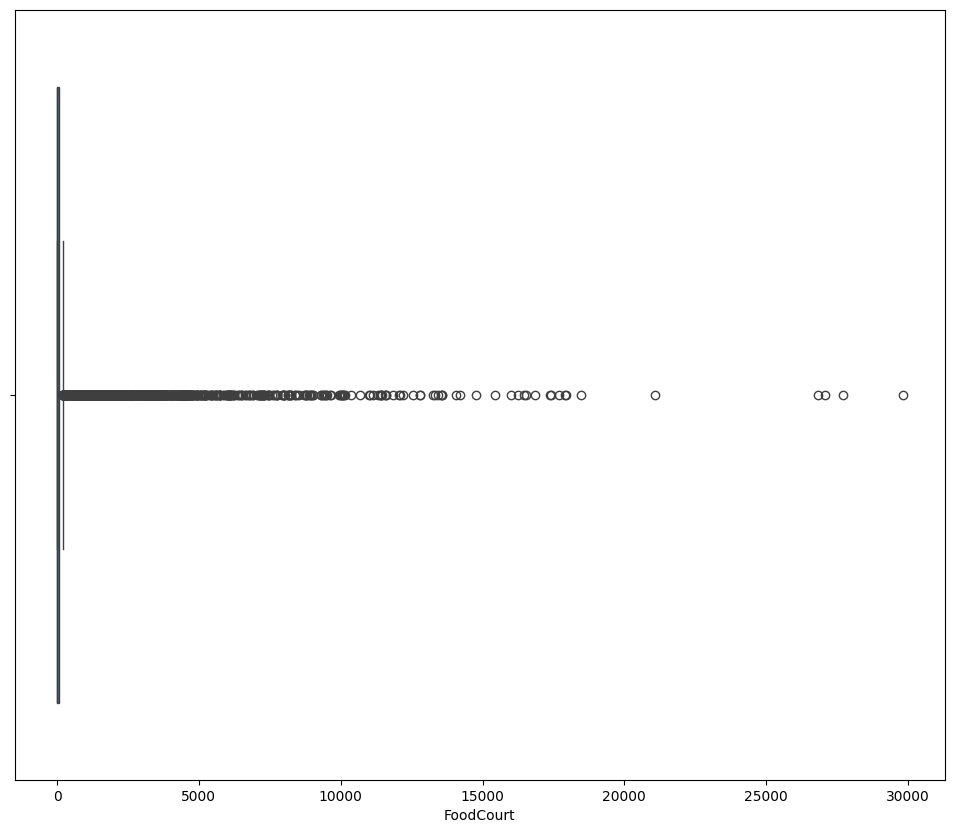

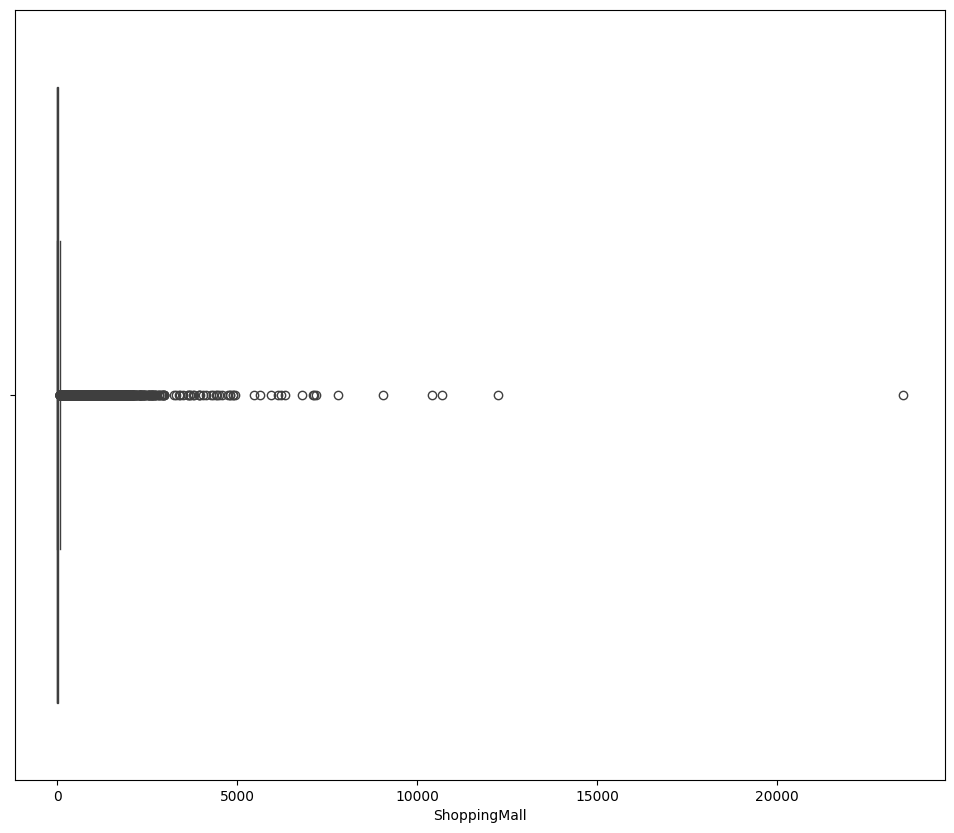

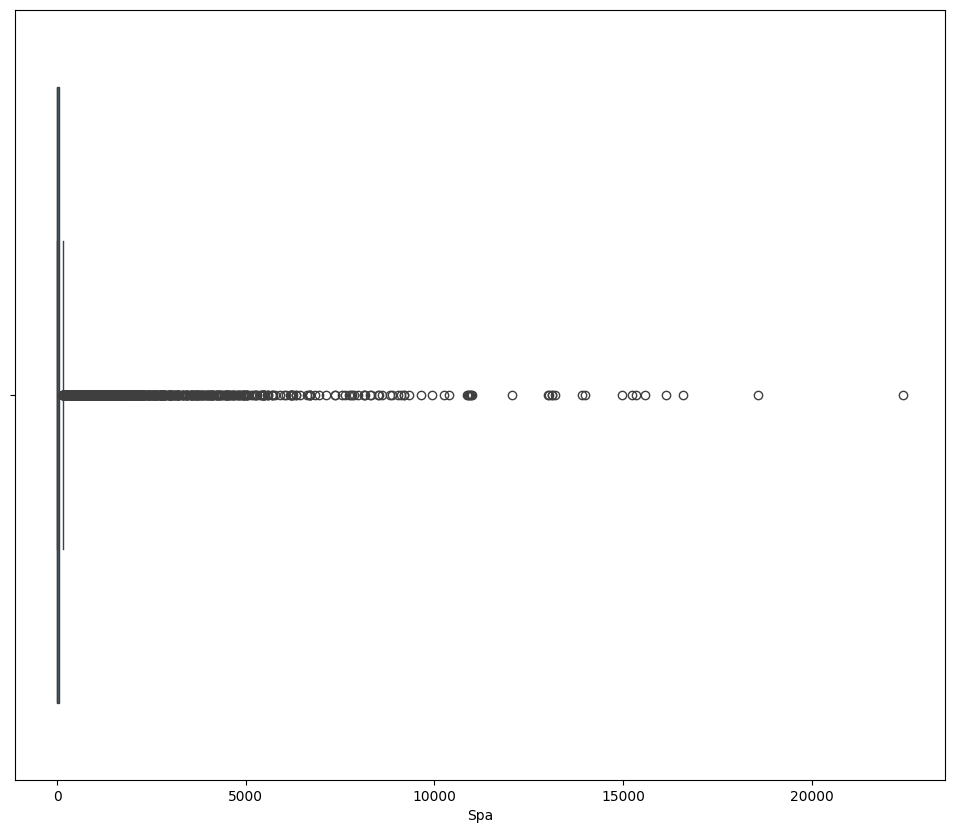

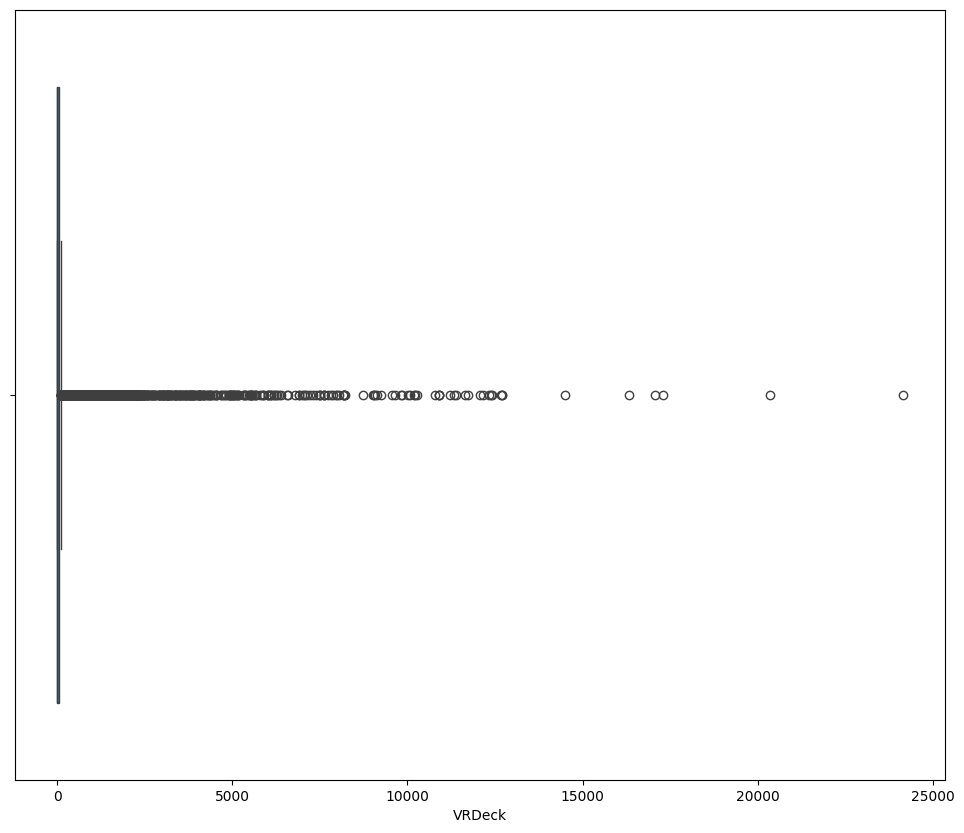

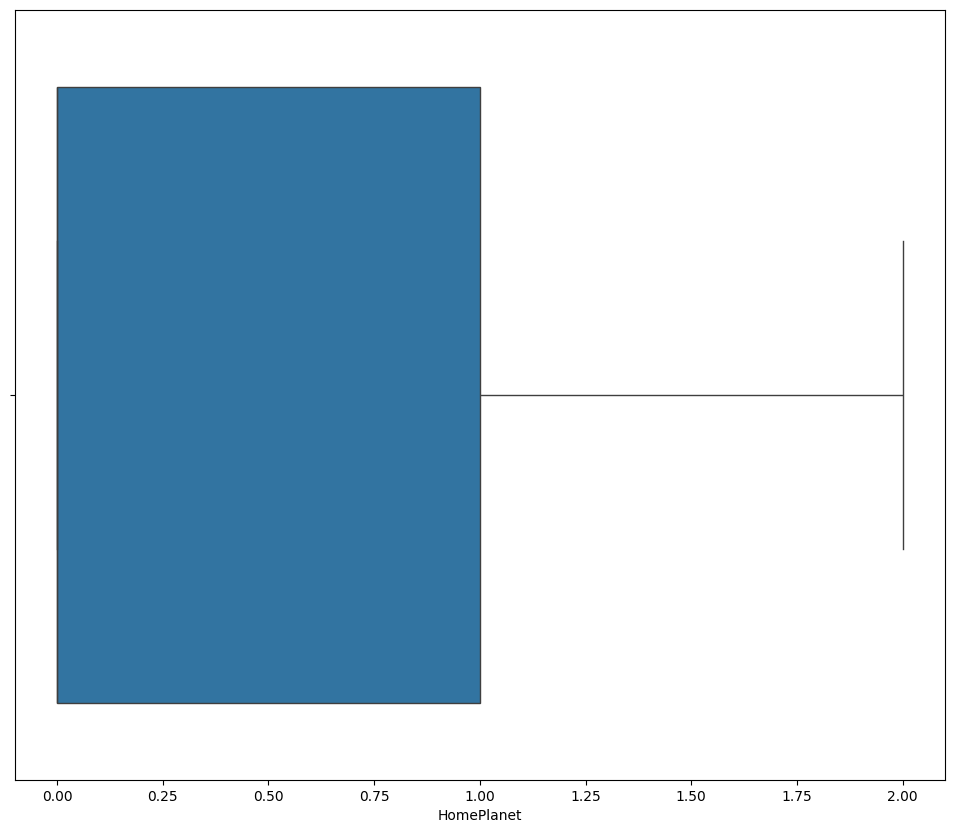

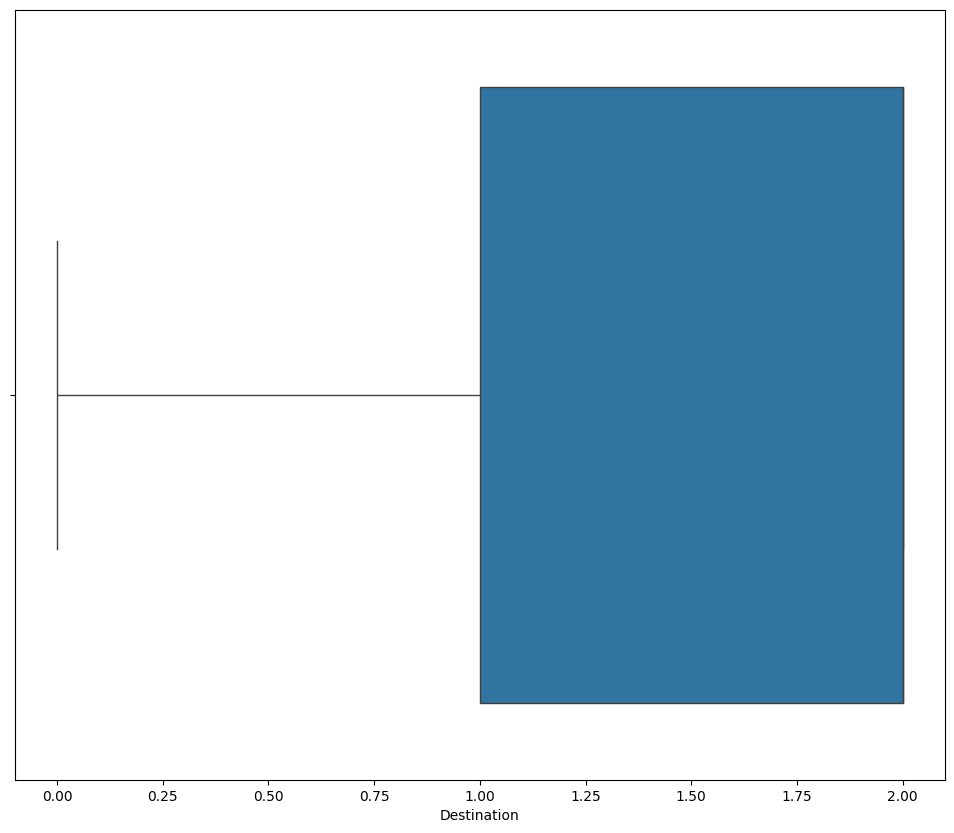

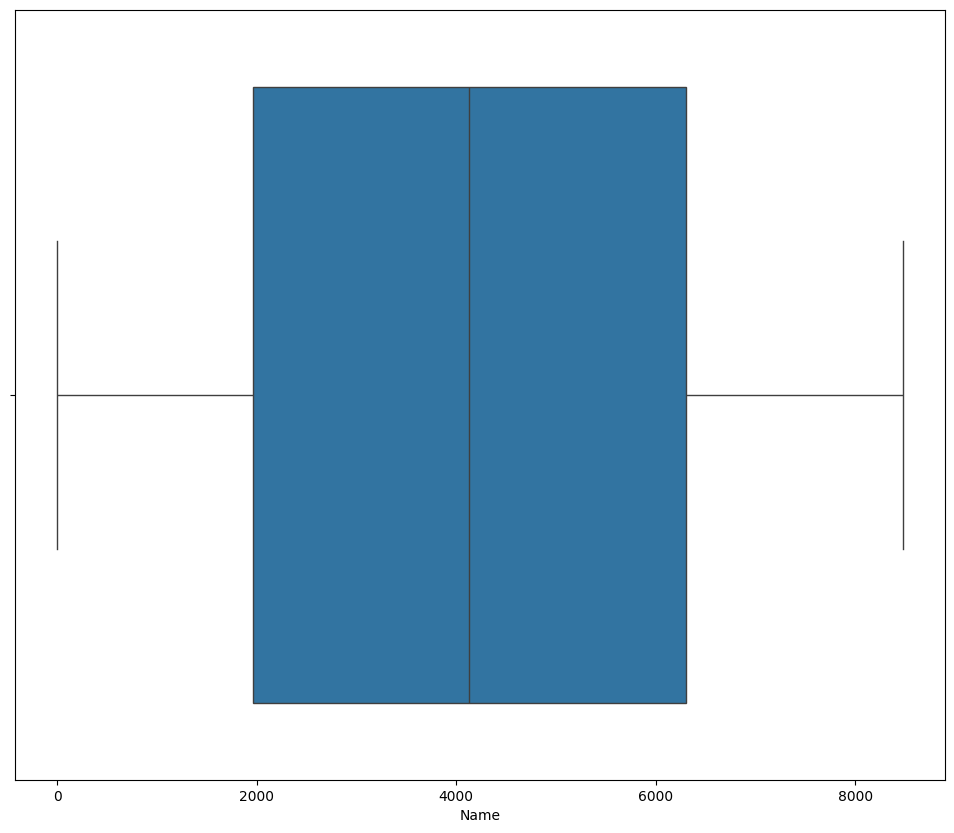

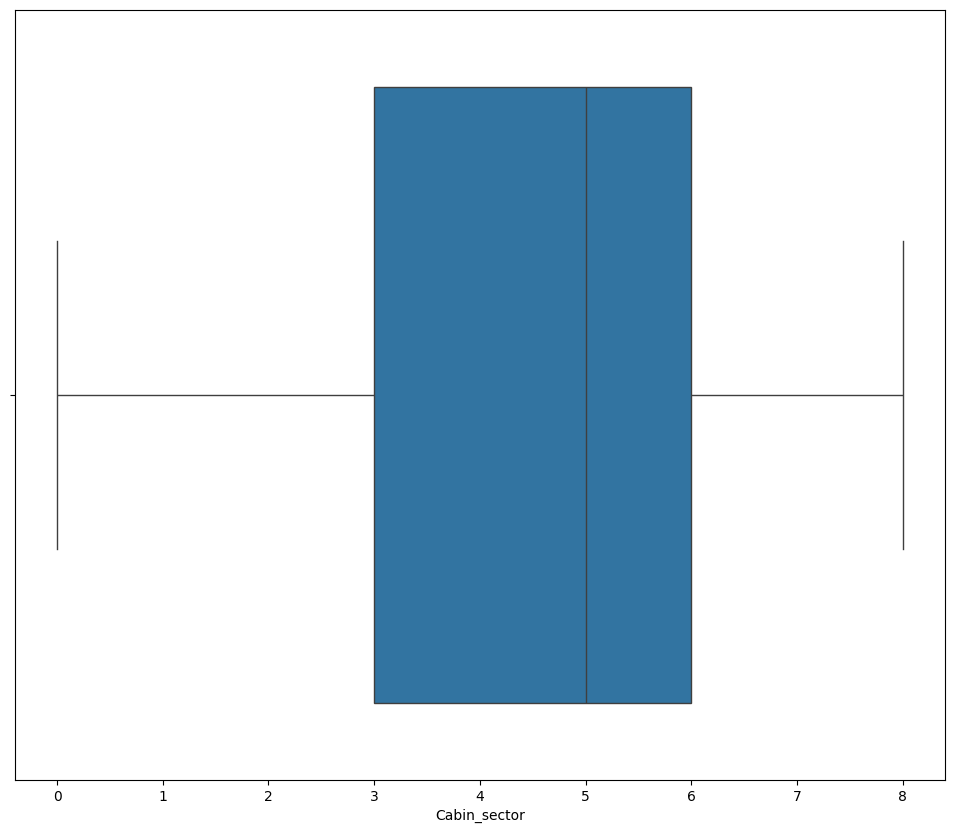

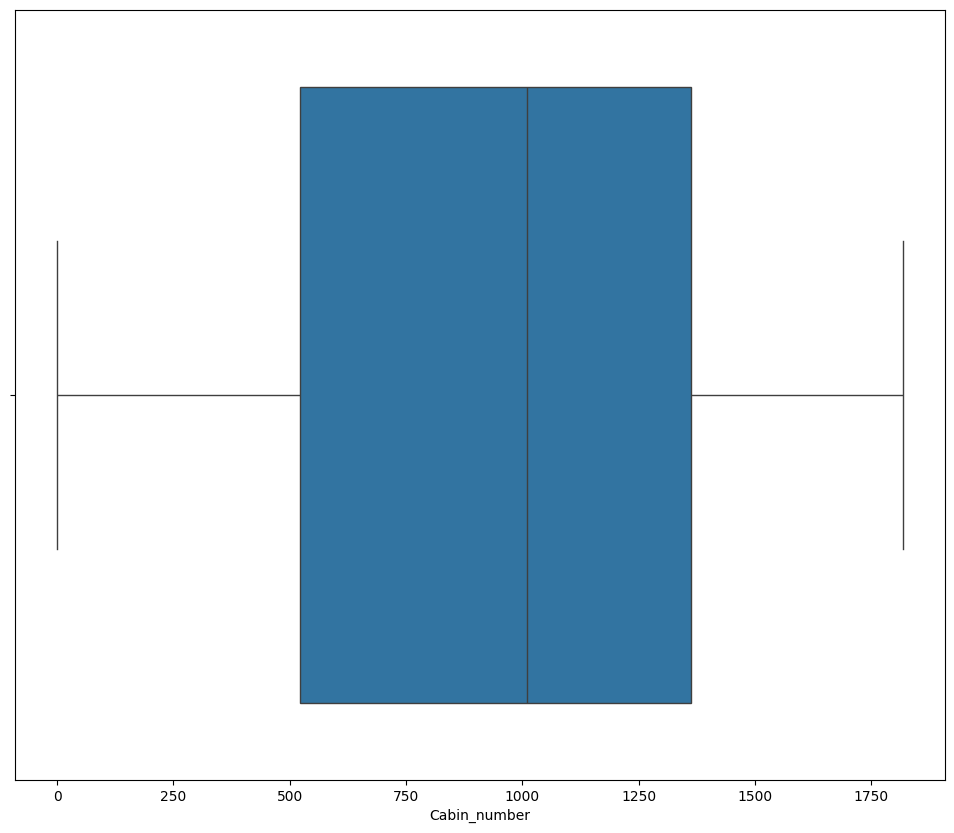

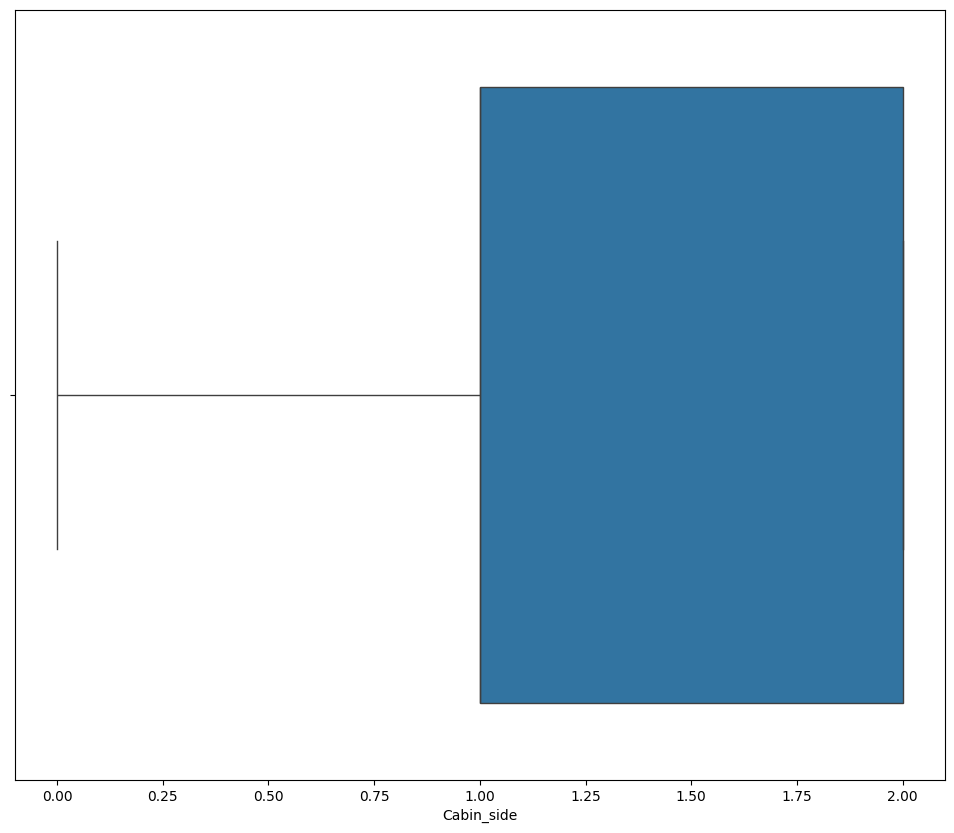

In [30]:
for columns in cols:
    fig, axs= plt.subplots(1, figsize=(12,10))
    sns.boxplot(x=data[columns])
    print(data[columns].describe())

In [31]:
anormal = [['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

In [32]:
media = data['VRDeck'].mean()
max = data['VRDeck'].max()
data['VRDeck'] = data['VRDeck'].replace(max, media)

In [33]:
max = data['VRDeck'].max()
data['VRDeck'] = data['VRDeck'].replace(max, media)
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_sector,Cabin_number,Cabin_side
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,5252.0,0.0,1.0,0.0,1.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,4502.0,1.0,5.0,0.0,2.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,457.0,0.0,0.0,0.0,2.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,7149.0,0.0,0.0,0.0,2.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,8319.0,1.0,5.0,1.0,2.0


In [34]:
media = data["Spa"].mean()
max = data["Spa"].max()
data["Spa"] = data["Spa"].replace(max, media)
max = data["Spa"].max()
data["Spa"] = data["Spa"].replace(max, media)

In [35]:
media = data["ShoppingMall"].mean()
max = data["ShoppingMall"].max()
data["ShoppingMall"] = data["ShoppingMall"].replace(max, media)

In [36]:
media = data["FoodCourt"].mean()
max = data["FoodCourt"].max()
data["FoodCourt"] = data["FoodCourt"].replace(max, media)
max = data["FoodCourt"].max()
data["FoodCourt"] = data["FoodCourt"].replace(max, media)
max = data["FoodCourt"].max()
data["FoodCourt"] = data["FoodCourt"].replace(max, media)
max = data["FoodCourt"].max()
data["FoodCourt"] = data["FoodCourt"].replace(max, media)

In [37]:
media = test_1["VRDeck"].mean()
max_value = test_1["VRDeck"].max()
test_1["VRDeck"] = test_1["VRDeck"].replace(max_value, media)
max_value = test_1["VRDeck"].max()
test_1["VRDeck"] = test_1["VRDeck"].replace(max_value, media)

media = test_1["Spa"].mean()
max_value = test_1["Spa"].max()
test_1["Spa"] = test_1["Spa"].replace(max_value, media)
max_value = test_1["Spa"].max()
test_1["Spa"] = test_1["Spa"].replace(max_value, media)

media = test_1["ShoppingMall"].mean()
max_value = test_1["ShoppingMall"].max()
test_1["ShoppingMall"] = test_1["ShoppingMall"].replace(max_value, media)

media = test_1["FoodCourt"].mean()
max_value = test_1["FoodCourt"].max()
test_1["FoodCourt"] = test_1["FoodCourt"].replace(max_value, media)
max_value = test_1["FoodCourt"].max()
test_1["FoodCourt"] = test_1["FoodCourt"].replace(max_value, media)
max_value = test_1["FoodCourt"].max()
test_1["FoodCourt"] = test_1["FoodCourt"].replace(max_value, media)
max_value = test_1["FoodCourt"].max()
test_1["FoodCourt"] = test_1["FoodCourt"].replace(max_value, media)

media = test_1["RoomService"].mean()
max_value = test_1["RoomService"].max()
test_1["RoomService"] = test_1["RoomService"].replace(max_value, media)

In [38]:
data.columns
data.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_sector,Cabin_number,Cabin_side
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,5252.0,0.0,1.0,0.0,1.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,4502.0,1.0,5.0,0.0,2.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,457.0,0.0,0.0,0.0,2.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,7149.0,0.0,0.0,0.0,2.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,8319.0,1.0,5.0,1.0,2.0


In [39]:
test_1.head()


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_sector,Cabin_number,Cabin_side
0,1301.0,0.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,2912.0,6.0,820.0,1.0
1,1801.0,0.0,0.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,2406.0,5.0,927.0,1.0
2,1901.0,1.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,3376.0,2.0,0.0,1.0
3,2101.0,1.0,0.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,2711.0,2.0,1.0,1.0
4,2301.0,0.0,0.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,668.0,5.0,1029.0,1.0


In [40]:
test_1 = test_1.drop("PassengerId", axis=1)


In [41]:
test_1.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_sector,Cabin_number,Cabin_side
0,0.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,2912.0,6.0,820.0,1.0
1,0.0,0.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,2406.0,5.0,927.0,1.0
2,1.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,3376.0,2.0,0.0,1.0
3,1.0,0.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,2711.0,2.0,1.0,1.0
4,0.0,0.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,668.0,5.0,1029.0,1.0


In [42]:
X = data.copy()
y = X.pop('Transported')

In [43]:
print(X.shape)
print(y.shape)

(8693, 14)
(8693,)


In [44]:
test_1.shape

(4277, 14)

In [45]:
X= data.drop('Transported', axis=1)
y= data['Transported']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 2, shuffle=True)


In [47]:
from sklearn.preprocessing import StandardScaler


In [48]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
model_1 = RandomForestClassifier(n_estimators=80,max_depth=13,min_samples_split=0.002)

model_1.fit(X_train,y_train)

RandomForestClassifier(max_depth=13, min_samples_split=0.002, n_estimators=80)

In [51]:
print('Training Accuracy: ', model_1.score(X_train,y_train))
print('Testing Accuracy: ', model_1.score(X_test,y_test))

Training Accuracy:  0.8876905378199598
Testing Accuracy:  0.8085106382978723


In [52]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
model_2 = xgb.XGBClassifier(n_estimators=110)

model_2.fit(X_train, y_train)  


print('Training Accuracy: ', model_2.score(X_train,y_train))
print('Testing Accuracy: ', model_2.score(X_test,y_test))

Training Accuracy:  0.9531205061834915
Testing Accuracy:  0.7964347326049454


In [54]:
sample = pd.read_csv("sample/sample_submission.csv")
sample["Transported"]

0       False
1       False
2       False
3       False
4       False
        ...  
4272    False
4273    False
4274    False
4275    False
4276    False
Name: Transported, Length: 4277, dtype: bool

In [55]:
prediction = model_1.predict(test_1)

C:\Users\jakub\Kurzy\space_titanic\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [56]:
pd.DataFrame(prediction)


,0
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
4272,1.0
4273,0.0
4274,1.0
4275,1.0


In [57]:
true_false = np.array(['True' if x == 1 else 'False' for x in prediction])

true_false = np.where(prediction == 1, 'True', 'False')
true_false = pd.DataFrame(true_false)

In [59]:
true_false = pd.DataFrame(true_false)

In [60]:
print(len(sample["PassengerId"]), len(true_false))

4277 4277


In [62]:
true_false['PassengerId'] = sample["PassengerId"]

In [63]:
Final = pd.DataFrame({'PassengerId': sample["PassengerId"], 'Transported': true_false[0]})
Final

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [65]:
Final.to_csv("Sumbission.csv", index=False)